# Normalizing the modified NFW (mNFW) profile [v1.0]

In [1]:
# import
from importlib import reload
import numpy as np

from matplotlib import pyplot as plt

from astropy import units
from astropy.cosmology import Planck15 as cosmo
from astropy.coordinates import SkyCoord

from frb.halos import models
from frb.figures import utils as fig_utils
from frb.defs import frb_cosmo as cosmo

# Modified NFW

## Init

In [7]:
reload(models)
mnfw = models.ModifiedNFW(alpha=2, y0=2, 
                          log_Mhalo=12.2, # total mass
                          norm_by_asymptote=True,
                         f_hot=1.)  # Put all the baryons in the halo

In [8]:
mnfw.r200

<Quantity 307.39991573 kpc>

In [9]:
mnfw.M_b.to('Msun'), mnfw.M_halo.to('Msun')

(<Quantity 6.74626367e+10 solMass>, <Quantity 1.58489319e+12 solMass>)

In [11]:
mnfw.rho0_b/mnfw.rho0, cosmo.Ob0/cosmo.Odm0

(<Quantity 0.18784764>, 0.18784763512217578)

# Compare density profiles

## Radial steps

In [12]:
rval = np.linspace(1, mnfw.r200.value*10, 1000) # kpc
nrval = rval.size
xyz = np.zeros((3, nrval))
xyz[2,:] = rval

## Densities

In [13]:
rho_b = mnfw.rho_b(xyz)
rho_dm = mnfw.rho_dm(xyz)

## Plot em

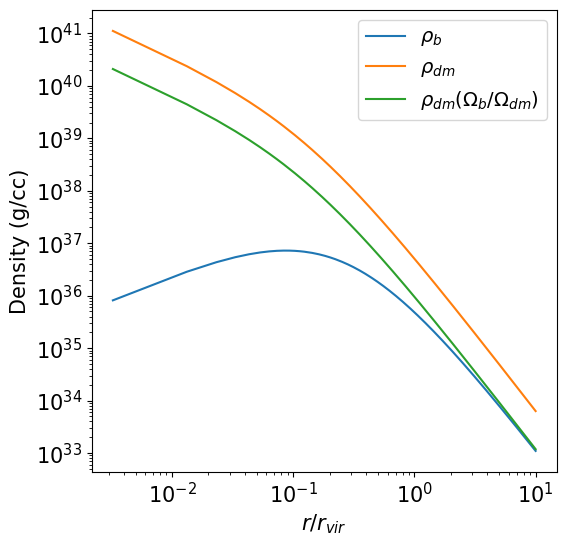

In [14]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
#
ax.plot(rval/mnfw.r200.value, rho_b, label=r'$\rho_b$')
ax.plot(rval/mnfw.r200.value, rho_dm, label=r'$\rho_{dm}$')
ax.plot(rval/mnfw.r200.value, rho_dm/(cosmo.Odm0/cosmo.Ob0), label=r'$\rho_{dm} (\Omega_b/\Omega_{dm})$')
#
ax.set_xlabel(r'$r/r_{vir}$')
ax.set_ylabel('Density (g/cc)')
ax.set_xscale('log')
ax.set_yscale('log')
#
fig_utils.set_fontsize(ax, 15.)
ax.legend(fontsize=14.)
#
plt.show()

### Ratios

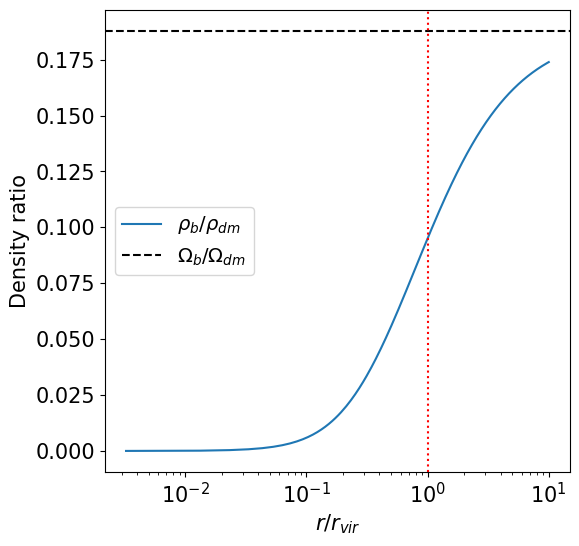

In [15]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
#
ax.plot(rval/mnfw.r200.value, rho_b/rho_dm, label=r'$\rho_b/\rho_{dm}$')
ax.axhline(y=(cosmo.Ob0/cosmo.Odm0), color='k', ls='--', label=r'$\Omega_b/\Omega_{dm}$')
ax.axvline(1., color='red', ls=':')
#
ax.set_xlabel(r'$r/r_{vir}$')
ax.set_ylabel('Density ratio')
ax.set_xscale('log')
#ax.set_yscale('log')
#
fig_utils.set_fontsize(ax, 15.)
ax.legend(fontsize=14.)
#
plt.show()

# Examine the masses

In [16]:
mnfw.r200

<Quantity 307.39991573 kpc>

In [17]:
M_b_r = (mnfw.rho0_b  * (4*np.pi) * (mnfw.r200/mnfw.c)**3 * mnfw.fy_b(mnfw.c*rval/mnfw.r200.value)).cgs
M_dm_r = (mnfw.rho0  * (4*np.pi) * (mnfw.r200/mnfw.c)**3 * mnfw.fy_dm(mnfw.c*rval/mnfw.r200.value)).cgs

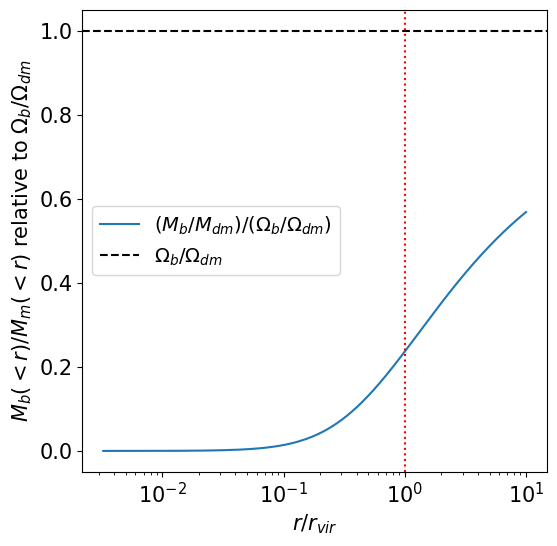

In [18]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
#
ax.plot(rval/mnfw.r200.value, (M_b_r/M_dm_r)/(cosmo.Ob0/cosmo.Odm0), label=r'$(M_b/M_{dm})/(\Omega_b/\Omega_{dm})$')
ax.axhline(y=1., color='k', ls='--', label=r'$\Omega_b/\Omega_{dm}$')
ax.axvline(1., color='red', ls=':')
#
ax.set_xlabel(r'$r/r_{vir}$')
ax.set_ylabel(r'$M_b(<r)/M_m(<r)$ relative to $\Omega_b/\Omega_{dm}$')
ax.set_xscale('log')
#ax.set_yscale('log')
#
fig_utils.set_fontsize(ax, 15.)
ax.legend(fontsize=14.)
#
plt.show()

# Clearly this is a total breakdown..

## Going to need yet another modification to the mNFW!
